In [328]:
#David Rumford
#CS 4410
#Homework 4

In [329]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [330]:
#loading the dataset
breast_cancer = load_breast_cancer()

In [331]:
#display label of every 50th sample
breast_cancer.target[::50]

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [332]:
#checking the sample size
breast_cancer.data.shape

(569, 30)

In [333]:
#confirming number of target values
#matches number of samples
breast_cancer.target.shape

(569,)

In [334]:
#splitting data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data,
breast_cancer.target, random_state=11)

In [335]:
#training set size
X_train.shape

(426, 30)

In [336]:
#testing set size
X_test.shape

(143, 30)

In [337]:
#creating the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [338]:
#training the model
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [339]:
#predicting
predicted = knn.predict(X=X_test)
expected = y_test

In [340]:
#predicted (for first 20 samples)
predicted[:20]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [341]:
#expected (for first 20 samples)
expected[:20]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [342]:
#estimator method score
print(f'{knn.score(X_test, y_test):.2%}')

94.41%


In [343]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[43,  7],
       [ 1, 92]])

In [344]:
#classification report
from sklearn.metrics import classification_report
names = [str(breast_cancer) for breast_cancer in breast_cancer.target_names]
print(classification_report(expected, predicted,
target_names=names))

              precision    recall  f1-score   support

   malignant       0.98      0.86      0.91        50
      benign       0.93      0.99      0.96        93

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.94       143
weighted avg       0.95      0.94      0.94       143



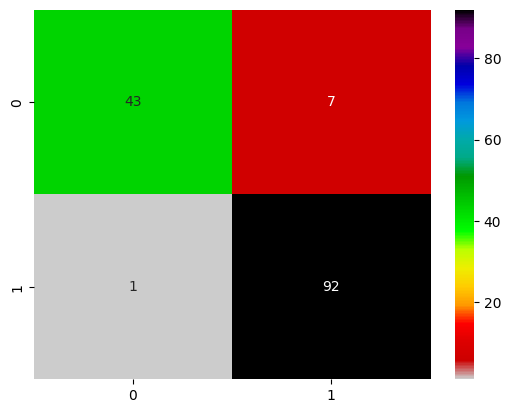

In [345]:
#visualizing the confusion matrix
import pandas as pd
confusion_df = pd.DataFrame(confusion, index=range(2),
    columns=range(2))

import seaborn as sns
axes = sns.heatmap(confusion_df, annot=True,
    cmap='nipy_spectral_r')

In [346]:
#K-Fold cross-validation
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [347]:
#using the KFold Object with Function cross_val_score:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=knn, X=breast_cancer.data,
    y=breast_cancer.target, cv=kfold)
scores

array([0.92982456, 0.94736842, 0.89473684, 0.92982456, 0.92982456,
       0.94736842, 0.89473684, 0.94736842, 0.94736842, 0.91071429])

In [ ]:
#Running mutliple models to find the best one
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

estimators = {
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': knn,
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr',
        max_iter=10000),
    'SVC': SVC(gamma='scale')}

In [349]:
#executing the models
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
      X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
    print(f'{estimator_name:>20}: ' +
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

          GaussianNB: mean accuracy=93.85%; standard deviation=2.75%
KNeighborsClassifier: mean accuracy=92.79%; standard deviation=2.01%
  LogisticRegression: mean accuracy=95.08%; standard deviation=3.02%
                 SVC: mean accuracy=91.92%; standard deviation=3.52%
